In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [2]:
plt.rc("font", family="Malgun Gothic")

In [6]:
covid19= pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_19420\2605454731.py:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19= pd.read_csv("../data/seoul_covid19.csv")


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

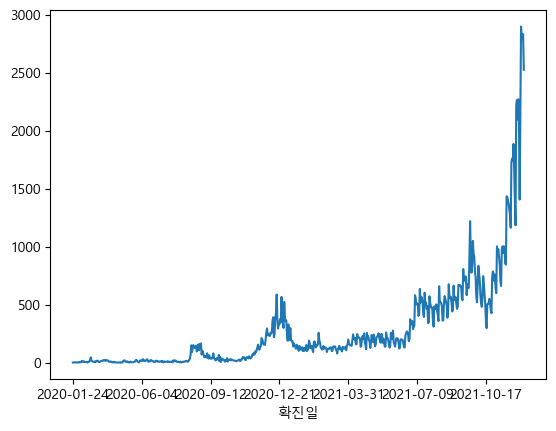

In [7]:
covid19.groupby("확진일")["연번"].count().plot()

<Axes: xlabel='확진일'>

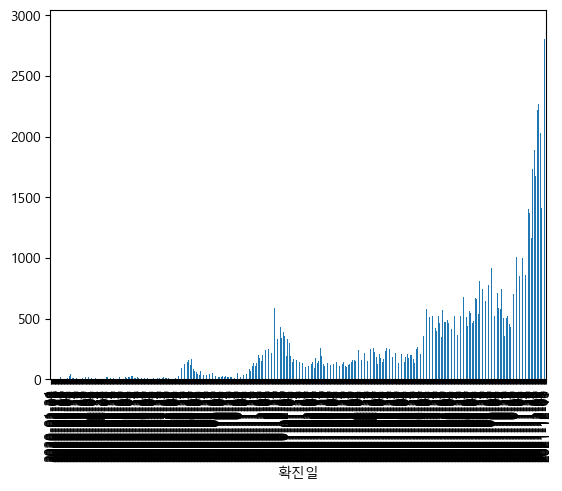

In [16]:
covid19.groupby("확진일")["연번"].count().plot(kind="bar")


In [19]:
# 공백 없애기
covid19["지역"] = covid19["지역"].apply(lambda x: x.strip())

In [20]:
covid19.loc[covid19["지역"]=="관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


In [22]:
target = ["동대문", "서대문", "송파", "영등포"]

In [25]:
# 구 를 concat
# sum =0
# for i in range(10):
# sum = sum +i
covid19["지역"] = covid19["지역"].apply(lambda x: x + "구" if x in target else x)

In [26]:
covid19["지역"]

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [27]:
covid19.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [30]:
#df 형태로 만듦
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
covid19_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [31]:
covid19_df.columns = ["ds", "y"]
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [32]:
from prophet import Prophet

In [51]:
# 예측 결과 조정하기 위해서 prophet 안에 조정해야 함
m = Prophet(changepoint_prior_scale=2.0)
m.fit(covid19_df)


17:51:43 - cmdstanpy - INFO - Chain [1] start processing
17:51:43 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [53]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-24,5.150145,-185.498314,273.289681,5.150145,5.150145,22.573491,22.573491,22.573491,22.573491,22.573491,22.573491,0.0,0.0,0.0,27.723636
1,2020-01-30,5.513267,-201.076292,258.075437,5.513267,5.513267,26.674637,26.674637,26.674637,26.674637,26.674637,26.674637,0.0,0.0,0.0,32.187904
2,2020-01-31,5.573787,-205.655794,259.419913,5.573787,5.573787,22.573491,22.573491,22.573491,22.573491,22.573491,22.573491,0.0,0.0,0.0,28.147278
3,2020-02-02,5.694828,-282.972834,179.974847,5.694828,5.694828,-59.697334,-59.697334,-59.697334,-59.697334,-59.697334,-59.697334,0.0,0.0,0.0,-54.002507
4,2020-02-05,5.876388,-172.929285,265.613036,5.876388,5.876388,29.165630,29.165630,29.165630,29.165630,29.165630,29.165630,0.0,0.0,0.0,35.042019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2022-01-06,1849.757883,1609.539767,2132.645510,1772.782506,1921.503034,26.674637,26.674637,26.674637,26.674637,26.674637,26.674637,0.0,0.0,0.0,1876.432520
682,2022-01-07,1860.078232,1618.321586,2150.557235,1779.364161,1938.761729,22.573491,22.573491,22.573491,22.573491,22.573491,22.573491,0.0,0.0,0.0,1882.651724
683,2022-01-08,1870.398582,1601.863829,2106.342699,1783.279766,1955.897914,-3.172251,-3.172251,-3.172251,-3.172251,-3.172251,-3.172251,0.0,0.0,0.0,1867.226331
684,2022-01-09,1880.718931,1564.138582,2073.739584,1787.516915,1971.574659,-59.697334,-59.697334,-59.697334,-59.697334,-59.697334,-59.697334,0.0,0.0,0.0,1821.021597


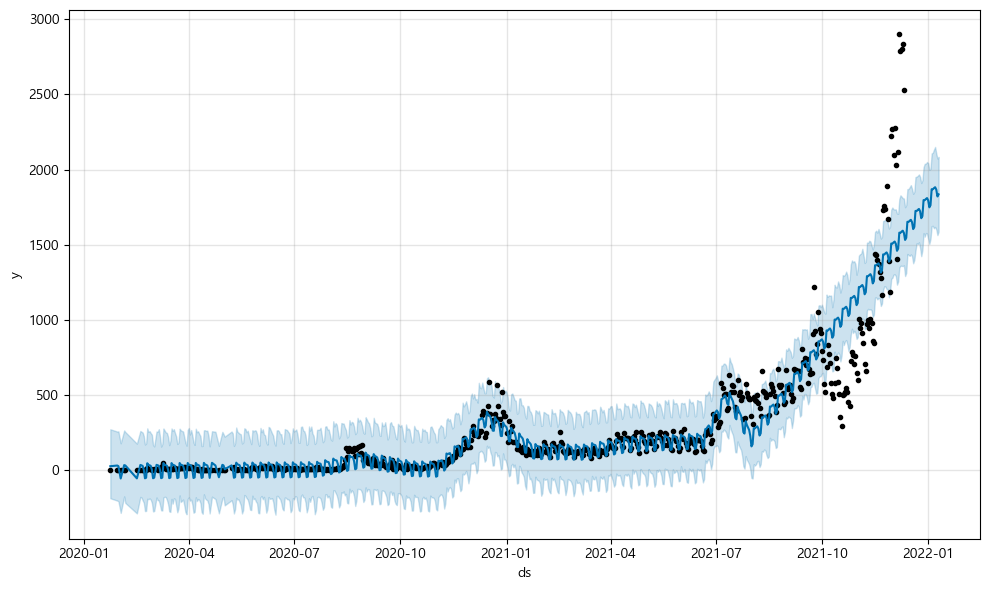

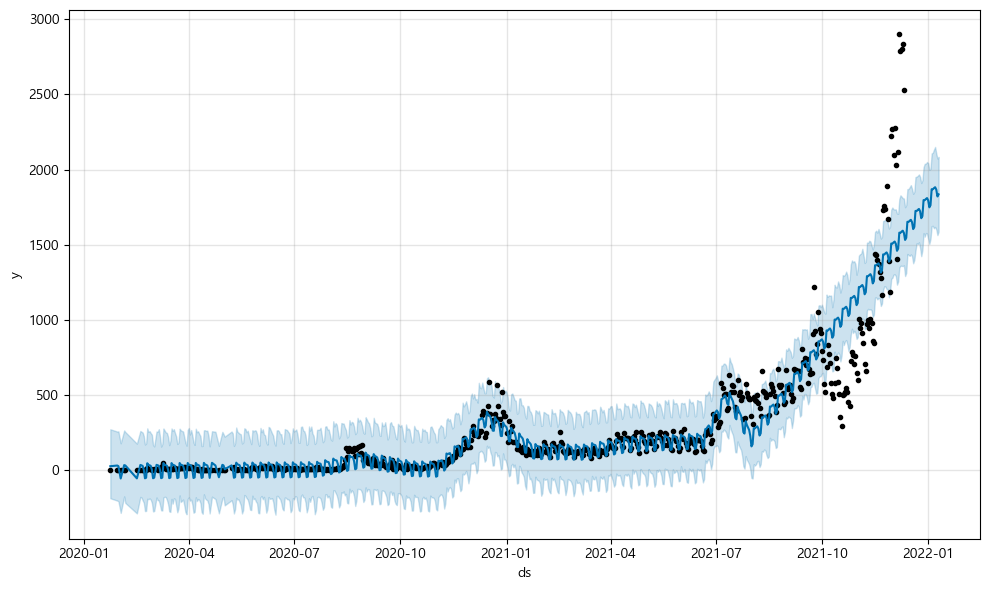

In [54]:
m.plot(forecast)

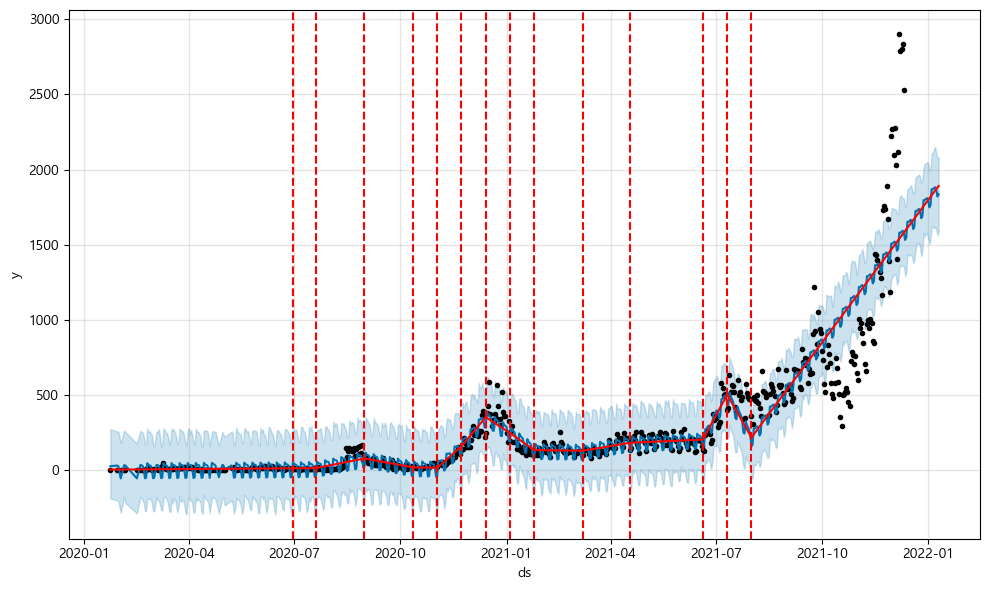

In [55]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [56]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [57]:
plot_components_plotly(m, forecast)